# 함수형 API

우리는 여태까지 Sequential API를 이용해서 신경망을 구성해왔습니다.  
Sequential API는 사용하기 매우 편리하지만 선형적인 신경망만을 구성할 수 있습니다.  
![](https://drive.google.com/uc?id=1bEbvUTjJzfU1Rx0CwZxeEH1lUiSu2UPi)

함수형 API를 이용해 신경망을 구성하는 방법을 보겠습니다.  
함수형 API는 선형적인 신경망을 넘어 2개 이상의 입력층, 중간층, 출력층을 가진 신경망을 구성하게 해줍니다.  
구성하는 방법은 수학에서 함수의 합성, 공장에서의 컨베이어 벨트 시스템과 유사합니다.  
![](https://drive.google.com/uc?id=12MB2hlGGg6R5aS9TjBjI3mep92ZpCHaQ)

---
[tf.keras.Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input)를 이용해 심볼릭 텐서(symbolic tensor)를 만듭니다.  

심볼릭 텐서는 수학으로 치면 미지수 $x$라고 생각하시면 됩니다.  
shape만 고정되있고 임의의 값을 취할 수 있는 텐서입니다.  
이 예에서 inputs는 임의의 3차원 벡터를 취할수 있습니다.

In [1]:
from tensorflow import keras
from keras.layers import Dense

inputs = keras.Input(shape=(3,))
print(inputs.shape)
print(inputs.dtype)

(None, 3)
<dtype: 'float32'>


층을 통과시켜서 새로운 심볼릭 텐서 2개를 만들었습니다.  
각각 64차원, 10차원 벡터인데 값이 정해지지는 않았습니다.  
수학으로 치면 $y=f(x)$, $z=g(y)$를 생각하는 것과 같습니다.

In [2]:
features = Dense(64, activation="relu")(inputs)
outputs = Dense(10, activation="softmax")(features)

print(f"features : {features.shape}, {features.dtype}")
print(f"outputs : {outputs.shape}, {outputs.dtype}")

features : (None, 64), <dtype: 'float32'>
outputs : (None, 10), <dtype: 'float32'>


[tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)에 인수로 입력 심볼릭 텐서와 출력 심볼릭 텐서를 지정해 줌으로써 신경망을 구성할수 있습니다.  
수학으로 치면 $z=(g \circ f)(x)$를 생각하는 것과 같습니다.

In [3]:
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**[실습1] (5분) Sequential API로 구현했던 다음 이진분류 신경망을 함수형 API로 다시 구현하고 summary를 출력하시오.**

![](https://drive.google.com/uc?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3)

In [4]:
inputs = keras.Input(shape=(10000,))
features_1 = Dense(16, activation="relu")(inputs)
features_2 = Dense(16, activation="relu")(features_1)
outputs = Dense(1, activation="sigmoid")(features_2)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


함수형 API를 사용해서 다중입력-다중출력 신경망을 구성해 보겠습니다.  
어떤 회사에서 홈페이지를 통해 고객으로부터 클레임을 접수받는다고 하죠.  
고객은 제목란과 본문란에 클레임을 입력하고 체크 버튼을 눌러서 100개 카테고리중에 해당하는 만큼 선택한다고 하겠습니다.  
여러분이 설계할 인공지능은 이를 입력받아 네 부서중 담당할 부서를 하나 선택하고 우선처리점수를 부여할 수 있어야 합니다.  
앞에서 했던 텍스트 전처리 방식을 적용한다고 가정하겠습니다.  
그러면 고객이 입력한 제목과 본문은 10,000차원 벡터로 전처리될것입니다.  

[Concatenate](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)층에서는 입력 데이터들을 이어붙입니다.  
이어붙이는 축은 디폴트값이 axis=-1입니다.  
여기서는 행렬들이 입력될테니 옆으로 이어붙이겠네요.  
실제로 10,000차원 + 10,000차원 + 100차원 = 20,100차원을 출력합니다.  

네 부서중 담당부서 하나를 선택하는 문제는 다중분류문제이고 우선처리점수를 부여하는 문제는 회기문제입니다.  
담당부서를 출력하는 층은 softmax로 끝나고 뉴런수가 넷입니다.  
우선처리점수는 0부터 1까지라고 하겠습니다.  
회귀문제이긴 한데 출력값이 0과 1사이여야하므로 우선처리점수를 출력하는 층은 sigmoid로 끝나고 하나의 뉴런을 갖습니다.

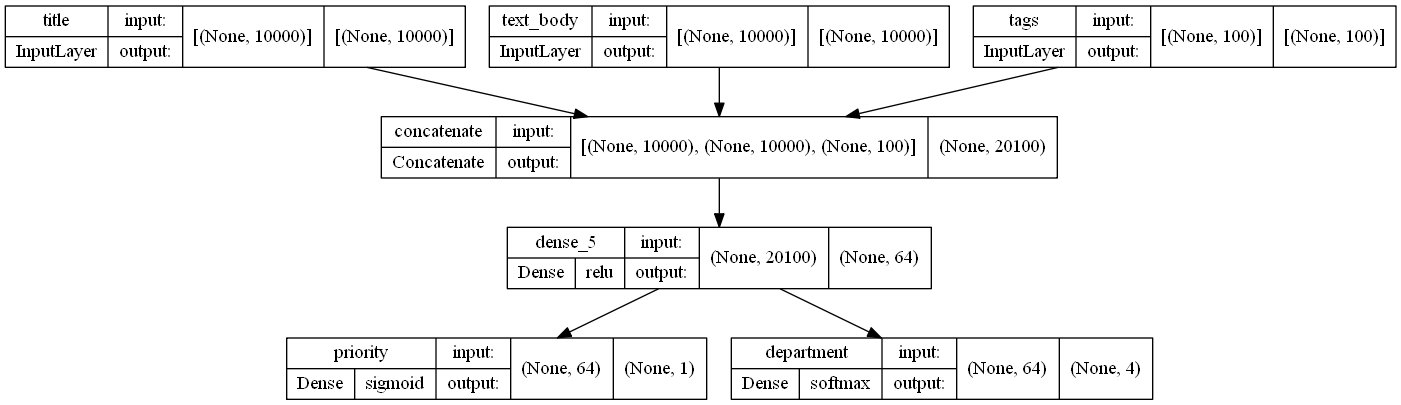

In [5]:
from keras.layers import Concatenate
from tensorflow.keras.utils import plot_model

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = Concatenate()([title, text_body, tags])
features = Dense(64, activation="relu")(features)

priority = Dense(1, activation="sigmoid", name="priority")(features)
department = Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

plot_model(model, show_shapes=True, show_layer_activations=True)

데이터를 랜덤하게 1,280개 만들어서 학습시키겠습니다.  
제목 데이터과 텍스트 데이터는 랜덤하게 0과 1로 이루어진 1,280$\times$10,000 행렬이고 태그 데이터는 랜덤하게 0과 1로 이루어진 1,280$\times$100 행렬입니다.  
우선처리점수 라벨은 0과 1사이에 랜덤하게 뽑은 1,280$\times$1 행렬이고 부서 라벨은 랜덤한 4차원 원 핫 벡터들을 쌓아올린 1,280$\times$4 행렬입니다.

---
분류와 회귀를 동시에 생각하는 신경망이기 때문에 학습설정시 우선처리점수부여는 평균제곱오차와 평균절대오차를 담당부서선택은 교차엔트로피와 정확도를 손실함수와 평가지표로 각각 선택해줍니다.

In [6]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.zeros((num_samples, num_departments))
department_data[range(num_samples), np.random.choice(num_departments, num_samples)] = 1

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step - loss: 2.1710 - priority_loss: 0.0834 - department_loss: 2.0876 - priority_mean_absolute_error: 0.2472 - department_accuracy: 0.2406


위에서처럼 리스트로 입력하면 순서를 신경써야 합니다.  
딕셔너리로 입력할수도 있습니다.

In [7]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": "mean_absolute_error", "department": "accuracy"})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 1.4615 - priority_loss: 0.0825 - department_loss: 1.3790 - priority_mean_absolute_error: 0.2482 - department_accuracy: 0.2867


첫번째 Affine층이 0부터 세면 4번째네요.

In [8]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

서비스가 시작되고 시간이 지나자 회사에서 클레임 처리 난이도를 상중하로 분류하는 기능을 인공지능에 추가하하고 싶어합니다.  
첫번째 Affine층의 출력값을 받아서 3중 분류하는 층에 입력해야합니다.  
분류문제이므로 softmax로 끝납니다.  
새로 만들지 않고 기존 신경망에 새로운 층을 추가 함으로써 업데이트가 가능합니다.  
이는 서비스 기간동안 미세조정한 기존 파라미터를 그대로 가져올수 있다는 것을 의미합니다.

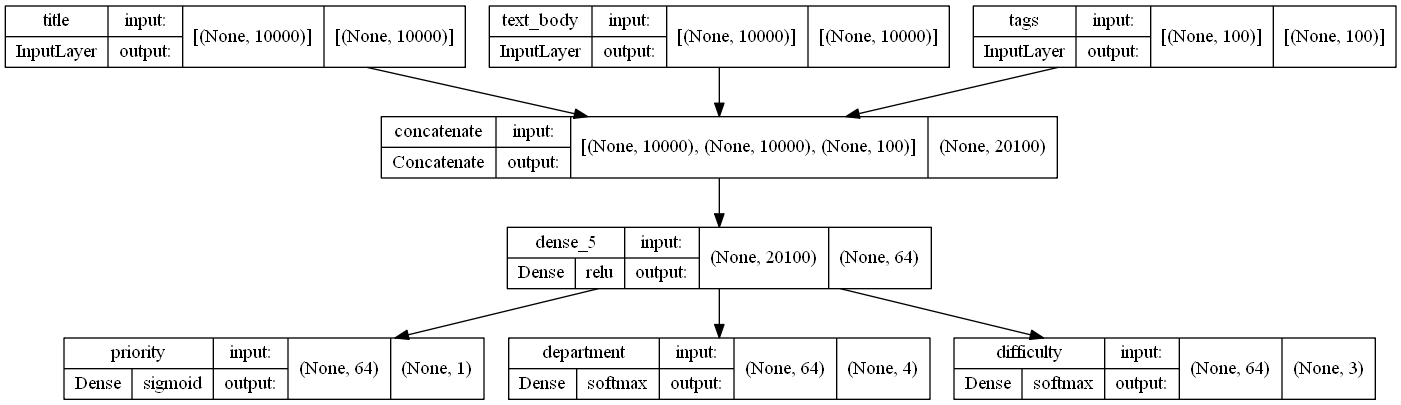

In [9]:
features = model.layers[4].output
num_difficulty=3
difficulty = Dense(num_difficulty, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

plot_model(new_model, show_shapes=True, show_layer_activations=True)

**[실습2] (10분) 난이도 데이터를 랜덤하게 만든후 위 신경망에 대해 학습, 평가, 예측 과정을 진행하시오.**

In [10]:
num_difficulty = 3
difficulty_data = np.zeros((num_samples, num_difficulty))
difficulty_data[range(num_samples), np.random.choice(num_difficulty, num_samples)] = 1

new_model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"], ["accuracy"]])
new_model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data, difficulty_data],
          epochs=1)
new_model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data, difficulty_data])
priority_preds, department_preds, difficulty_preds = new_model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step - loss: 2.5581 - priority_loss: 0.0821 - department_loss: 1.3776 - difficulty_loss: 1.0984 - priority_mean_absolute_error: 0.2479 - department_accuracy: 0.2875 - difficulty_accuracy: 0.3281


# Subclassing API

Subclassing API는 상속을 통해 신경망 클래스를 정의합니다.
- 상속받을 클래스는 [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)입니다.
- 초기화할때 `super().__init__()`로 부모 클래스를 초기화합니다.
- 초기화할때 각 층의 인스턴스를 만듭니다. 밑바닥부터 시작하는 딥러닝 코드도 그렇습니다.
- 순전파는 `call`메서드로 작성합니다.  밑바닥부터 시작하는 딥러닝 코드의 `predict`메서드와 같은 역할입니다.
- 각 층의 순전파는 `__call__` 메서드로 작성되어 있기 때문에 순전파시 메서드 이름을 따로 붙일 필요가 없고 각층의 인스턴스 이름이면 충분합니다. 밑바닥부터 시작하는 딥러닝 코드에서는 forward 메서드를 붙였습니다.

![](https://drive.google.com/uc?id=1biPbvoEMm1S1cE593pVijgM2dgyLcgaI)

In [11]:
class CustomerClaimModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = Concatenate()
        self.mixing_layer = Dense(64, activation="relu")
        self.priority_scorer = Dense(1, activation="sigmoid")
        self.department_classifier = Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

인스턴스로 신경망을 생성합니다.  
[tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)를 상속받았기 때문에 comple, fit, evaluate, predict 메서드를 모두 사용할 수 있습니다.

In [12]:
model = CustomerClaimModel(num_departments=4)

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 2.5341 - output_1_loss: 0.3272 - output_2_loss: 2.2070 - output_1_mean_absolute_error: 0.4957 - output_2_accuracy: 0.2438


**[실습3] (10분) 1번 실습문제에서 함수형 API로 구현했던 신경망을 Subclassing API로 다시 구현하시오.**

![](https://drive.google.com/uc?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3)

In [13]:
class Model(keras.Model):

    def __init__(self):
        super().__init__()
        self.hidden_1 = Dense(16, input_shape=(10000,), activation="relu")
        self.hidden_2 = Dense(16, activation="relu")
        self.out_layer = Dense(1, activation="sigmoid")
        
    def call(self, input):
        feature_1 = self.hidden_1(input)
        feature_2 = self.hidden_2(feature_1)
        out = self.out_layer(feature_2)
        return out
    
model = Model()

**[실습4] (5분) 2번 실습문제에서 훈련시킨 신경망을 Subclassing API로 다시 구현하시오.**

In [14]:
class CustomerClaimModel(keras.Model):

    def __init__(self, num_departments, num_difficulty):
        super().__init__()
        self.concat_layer = Concatenate()
        self.mixing_layer = Dense(64, activation="relu")
        self.priority_scorer = Dense(1, activation="sigmoid")
        self.department_classifier = Dense(
            num_departments, activation="softmax")
        self.difficulty_classifier = Dense(
            num_difficulty, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        difficulty = self.difficulty_classifier(features)
        return priority, department, difficulty
    
model = CustomerClaimModel(num_departments=4, num_difficulty=3)

# 함수형 API + Subclassing API

전체는 함수형 API로 만들고 마지막 층을 Subclassing API로 만들어서 끼워 넣었습니다.

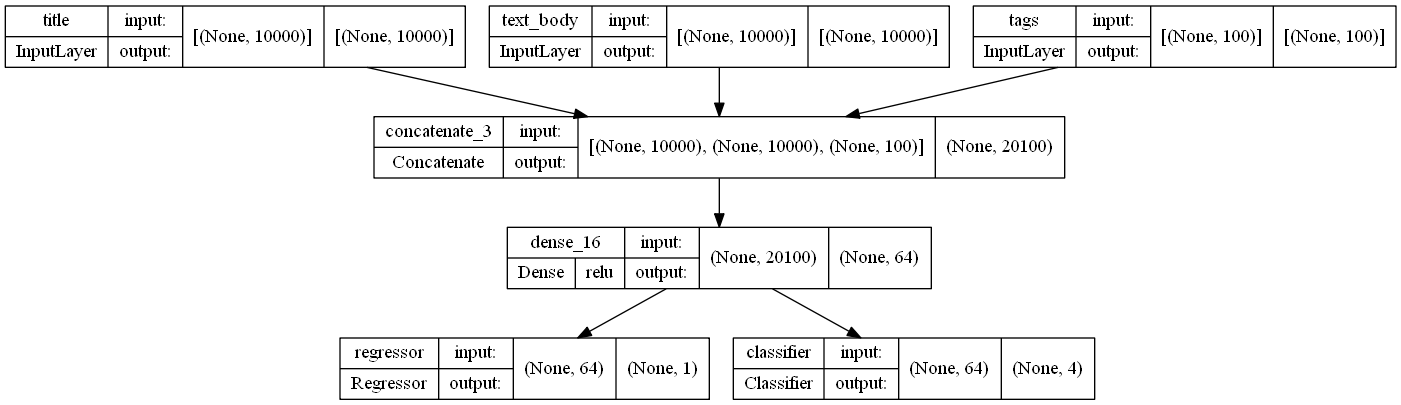

In [15]:
class Classifier(keras.Model):

    def __init__(self, num_classes):
        super().__init__()
        self.dense = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        return self.dense(inputs)

class Regressor(keras.Model):

    def __init__(self):
        super().__init__()
        self.dense = Dense(1, activation="sigmoid")

    def call(self, inputs):
        return self.dense(inputs)

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = Concatenate()([title, text_body, tags])
features = Dense(64, activation="relu")(features)


department = Classifier(num_departments)(features)
priority = Regressor()(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

plot_model(model, show_shapes=True, show_layer_activations=True)

**[실습5] (5분) 2번 실습문제에서 훈련시킨 신경망을 전체는 함수형 API로 마지막 층은 Subclassing API로 끼워 넣어 재구성하시오. plot_model을 적용하시오.**

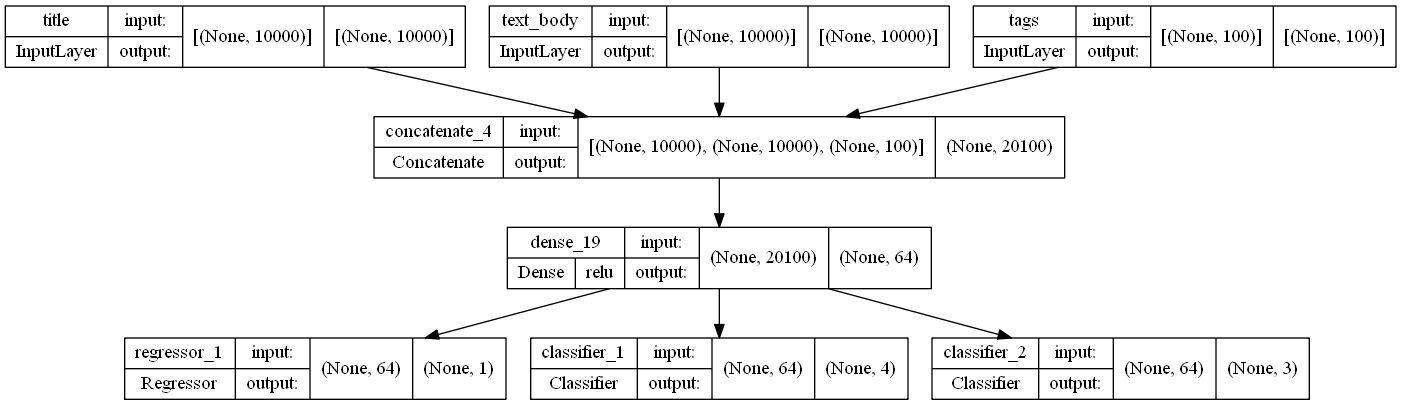

In [16]:
class Classifier(keras.Model):

    def __init__(self, num_classes):
        super().__init__()
        self.dense = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        return self.dense(inputs)

class Regressor(keras.Model):

    def __init__(self):
        super().__init__()
        self.dense = Dense(1, activation="sigmoid")

    def call(self, inputs):
        return self.dense(inputs)

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = Concatenate()([title, text_body, tags])
features = Dense(64, activation="relu")(features)


num_difficulty=3
department = Classifier(num_departments)(features)
difficulty = Classifier(num_difficulty)(features)
priority = Regressor()(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

plot_model(model, show_shapes=True, show_layer_activations=True)

전체는 Subclassing API로 만들고 마지막 층을 함수형 API로 만들어서 끼워 넣었습니다.

In [17]:
inputs = keras.Input(shape=(64,))
priority = Dense(1, activation="sigmoid", name="priority")(inputs)
department = Dense(num_departments, activation="softmax", name="department")(inputs)
last_layer = keras.Model(inputs=inputs, outputs=[priority, department])

class CustomerClaimModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = Concatenate()
        self.mixing_layer = Dense(64, activation="relu")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = last_layer(features)[0]
        department = last_layer(features)[1]
        return priority, department

model = CustomerClaimModel(num_departments)

**[실습6] (5분) 2번 실습문제에서 훈련시킨 신경망을 전체는 Subclassing API로 마지막 층은 함수형 API로 끼워 넣어 재구성하시오.**

In [18]:
num_difficulty=3

inputs = keras.Input(shape=(64,))
priority = Dense(1, activation="sigmoid", name="priority")(inputs)
department = Dense(num_departments, activation="softmax", name="department")(inputs)
difficulty = Dense(num_difficulty, activation="softmax", name="difficulty")(inputs)
last_layer = keras.Model(inputs=inputs, outputs=[priority, department, difficulty])

class CustomerClaimModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = Concatenate()
        self.mixing_layer = Dense(64, activation="relu")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = last_layer(features)[0]
        department = last_layer(features)[1]
        difficulty = last_layer(features)[2]
        return priority, department, difficulty

model = CustomerClaimModel(num_departments)